<a href="https://colab.research.google.com/github/Samuelelreal/Trabajo-1-metodos-matematicos/blob/main/Codigo_Calibracion_de_Sensores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
#ponemos los url que contienen el patron de referencia(url) y los datos del sensor de bajo costo(url2) y leemos los datos del patron de referencia con la libreria pandas

url = "https://github.com/nunezluis/MisCursos/raw/main/MisMateriales/Asignaciones/TallerDistancias/DatosDistancias/Datos%20Estaciones%20AMB.xlsx"
patron_referencia = pd.read_excel(url, header=0)
url2 = "https://raw.githubusercontent.com/nunezluis/MisCursos/refs/heads/main/MisMateriales/Asignaciones/TallerDistancias/DatosDistancias/mediciones_clg_normalsup_pm25_a_2018-11-01T00_00_00_2018-11-30T23_59_59.csv"

In [ ]:
#guardamos los datos del patron de referencia en la variable "patron de referencia"

print(patron_referencia.head())

             Date&Time    PM10   PM2.5 NO2 ppb  O3 ppb Temp_Aire  Lluvia  \
0            Date&Time   ug/m3   ug/m3   ug/m3   ug/m3         C      mm   
1  2018-10-01 00:00:00  NoData  NoData  NoData  NoData    NoData  NoData   
2  2018-10-01 01:00:00  NoData  NoData  NoData  NoData    NoData  NoData   
3  2018-10-01 02:00:00  NoData  NoData  NoData  NoData    NoData  NoData   
4  2018-10-01 03:00:00  NoData  NoData  NoData  NoData    NoData  NoData   

  Humedad_Relativa      WD      WS R_Solar  
0                %  grados     m/s    W/m2  
1           NoData  NoData  NoData  NoData  
2           NoData  NoData  NoData  NoData  
3           NoData  NoData  NoData  NoData  
4           NoData  NoData  NoData  NoData  


In [ ]:
#Patron de referencia es una matriz que contiene todos las filas y columnas del archivo de excel
#Las unicas columnas con las que vamos a trabajar son la del tiempo y la de los datos de concentracion del material particulado
#La columna de tiempo esta guardada en tipo string por lo que convertimos las variables a tipo datetime. Una variable de tiempo con la cual podemos trabajar mas facil



patron_referencia["Date&Time"] = pd.to_datetime(
    patron_referencia["Date&Time"],
    errors="coerce",         # convierte inválidos en NaT
    infer_datetime_format=True
)

PM25_referencia = patron_referencia["PM2.5"].to_numpy()



/tmp/ipython-input-1836427815.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  patron_referencia["Date&Time"] = pd.to_datetime(
/tmp/ipython-input-1836427815.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  patron_referencia["Date&Time"] = pd.to_datetime(


In [ ]:
#La columna de tiempo para los datos del sensor, tambien esta guardada en tipo string por lo que convertimos las variables a tipo datetime

patron_sensor = pd.read_csv(url2)

patron_sensor["fecha_hora_med"] = pd.to_datetime(
    patron_sensor["fecha_hora_med"],
    errors = "coerce",
    infer_datetime_format=True
)

print(patron_sensor.head())


#Guardamos el tiempo de los datos del patron en un array y los tiempos de los datos del patron en otro array

PM25_sensor = patron_sensor["valor"].to_numpy()

tm_patron = np.array([ [t.year, t.month, t.day, t.hour, t.minute] for t in patron_referencia["Date&Time"] ])

tm_sensor = np.array([[s.year, s.month, s.day, s.hour, s.minute ] for s in patron_sensor["fecha_hora_med"]])

                    fecha_hora_med id_parametro      valor
0 2018-12-01 04:01:10.470000+00:00       pm25_a  11.714286
1 2018-12-01 03:01:21.774000+00:00       pm25_a  13.999999
2 2018-12-01 02:01:11.940000+00:00       pm25_a  17.000000
3 2018-12-01 01:01:11.357000+00:00       pm25_a  17.571430
4 2018-12-01 00:01:11.955000+00:00       pm25_a  15.285713


/tmp/ipython-input-2530678566.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  patron_sensor["fecha_hora_med"] = pd.to_datetime(


In [ ]:
#Los datos del patron de referencia estan divididos por horas, para cada hora hay un dato distinto de PM2.5
#Por lo que para que haya una correspondencia uno a uno entro los datos del patron y los datos del sensor, vamos a sacar el promedio de los datos del sensor para cada hora
#Por ejemplo si el 11 - nov- 2018 entre las 4:00 - 5:00 hay 7 datos para PM2.5, vamos a promediarlos y el valor promediado va a corresponder con los datos del sensor para el 11 - nov - 2018 a las 4:00
#Todo eso lo hacemos con la siguiente funcion


def promediar_por_hora(tiempo_sensor, pm25_sensor):

    # 1. Convertir matriz nx5 en timestamps pandas
    fechas = pd.to_datetime({
        'year': tiempo_sensor[:,0],
        'month': tiempo_sensor[:,1],
        'day': tiempo_sensor[:,2],
        'hour': tiempo_sensor[:,3],
        'minute': tiempo_sensor[:,4]
    })

    # 2. Crear DataFrame con fecha y valores
    df = pd.DataFrame({'fecha': fechas, 'pm25': pm25_sensor})

    # 3. Agrupar por hora (redondeando a la hora inferior)
    df_horas = df.resample('1H', on='fecha').mean().dropna()

    return df_horas

# --- Uso ---
df_horario = promediar_por_hora(tm_sensor, PM25_sensor)

df_horario.head()


/tmp/ipython-input-2435848047.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_horas = df.resample('1H', on='fecha').mean().dropna()


,pm25
fecha,
2018-11-03 23:00:00,8.680555
2018-11-04 00:00:00,8.472222
2018-11-04 01:00:00,6.909722
2018-11-04 02:00:00,6.347222
2018-11-04 03:00:00,7.833333


In [ ]:
#Como ya tenemos una correspondencia uno a uno entre los datos del patron y los datos del sensor podemos calcular la distancia euclidea entre ambos
#Con la siguiente funcion podemos calcular la distancia euclidea y el error cuadratico medio y los errores entre cada par de datos correspondientes
#La distancia euclidea la explicamos mas a fondo en el documento

def calcular_distancia(df_sensor, df_patron):
    # Asegurar índices
    df_sensor = df_sensor.rename(columns={"pm25": "pm25_sensor"})
    if "Date&Time" in df_patron.columns:
        df_patron = df_patron.set_index("Date&Time")
    df_patron = df_patron.rename(columns={"PM2.5": "pm25_ref"})

    # Tomar solo columnas de interés
    df_sensor = df_sensor[["pm25_sensor"]]
    df_patron = df_patron[["pm25_ref"]]

    # Unir por índices de tiempo comunes
    df_join = df_sensor.join(df_patron, how="inner")

    # Calcular error
    errores = df_join["pm25_sensor"] - df_join["pm25_ref"]
    df_join["error"] = errores

    # Distancia euclídea
    D = np.sqrt(np.sum(errores ** 2))

    # Error cuadratico medio
    RMSE = np.sqrt(np.mean(errores ** 2))

    return D, RMSE, errores, df_join

Distancia euclídea: 74.58884133836176
RMSE: 6.237432260489162
                     pm25_sensor pm25_ref     error
2018-11-03 23:00:00     8.680555     14.9 -6.219445
2018-11-04 00:00:00     8.472222      9.7 -1.227778
2018-11-04 01:00:00     6.909722     11.1 -4.190278
2018-11-04 02:00:00     6.347222     12.2 -5.852778
2018-11-04 03:00:00     7.833333      9.1 -1.266667


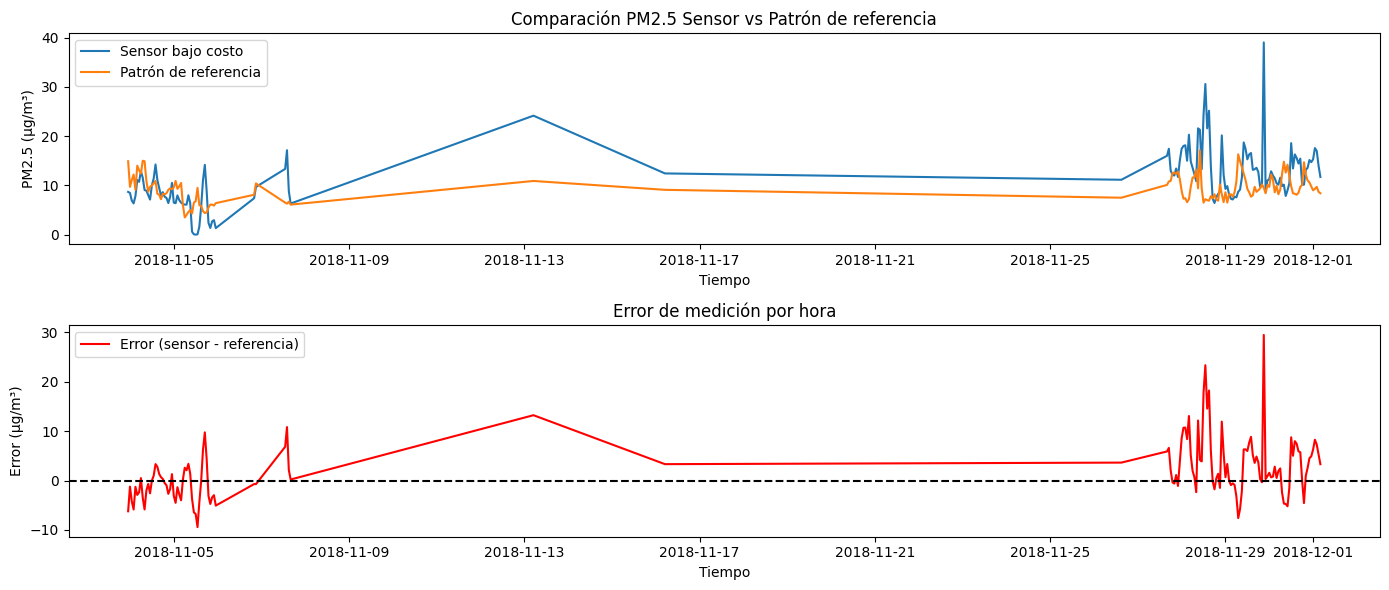

In [ ]:
#D sera la distancia euclidea entre los dos conjuntos de datos, RMSE sera el error cuadratico medio, errores sera la diferencia entre cada par de datos correspondientes y df_comparacion una tabla con todos ->
#estos datos anteriores

D, RMSE, errores, df_comparacion = calcular_distancia(df_horario, patron_referencia)

print("Distancia euclídea:", D)
print("RMSE:", RMSE)
print(df_comparacion.head())

plt.figure(figsize=(14,6))

#En el siguiente codigo realizamos una grafica entre los datos del sensor y los datos del patron de referencia

# PM2.5 Sensor vs Referencia
plt.subplot(2,1,1)
plt.plot(df_comparacion.index, df_comparacion["pm25_sensor"], label="Sensor bajo costo")
plt.plot(df_comparacion.index, df_comparacion["pm25_ref"], label="Patrón de referencia")
plt.legend()
plt.title("Comparación PM2.5 Sensor vs Patrón de referencia")
plt.xlabel("Tiempo")
plt.ylabel("PM2.5 (µg/m³)")

# Errores
plt.subplot(2,1,2)
plt.plot(df_comparacion.index, df_comparacion["error"], color="red", label="Error (sensor - referencia)")
plt.axhline(0, color="black", linestyle="--")
plt.legend()
plt.title("Error de medición por hora")
plt.xlabel("Tiempo")
plt.ylabel("Error (µg/m³)")

plt.tight_layout()
plt.show()

In [ ]:
#En la anterior celda calculamos la distancia euclidea y el error de medicion para el promedio o ventana de 1 hora, ahora con el siguiente codigo obtenemos la distancia euclidea o el error para ->
#cualquier ventana que queramos

def calcular_distancia_ventana(df_sensor, df_patron, ventana="1H"):
    # --- Sensor ---
    df_sensor = df_sensor.rename(columns={"pm25": "pm25_sensor"})
    df_sensor = df_sensor[["pm25_sensor"]]  # tomar solo la columna de interés
    df_sensor = df_sensor.resample(ventana).mean()

    # --- Patrón ---
    if "Date&Time" in df_patron.columns:
        df_patron = df_patron.set_index("Date&Time")

    # Tomar solo la columna PM2.5 y convertir a numérico
    df_patron = df_patron[["PM2.5"]].copy()
    df_patron["PM2.5"] = pd.to_numeric(df_patron["PM2.5"], errors="coerce")
    df_patron = df_patron.rename(columns={"PM2.5": "pm25_ref"})
    df_patron = df_patron.resample(ventana).mean()

    # --- Unión ---
    df_join = df_sensor.join(df_patron, how="inner")

    # --- Errores y métricas ---
    errores = df_join["pm25_sensor"] - df_join["pm25_ref"]
    D = np.sqrt(np.sum(errores.dropna() ** 2))
    RMSE = np.sqrt(np.nanmean(errores ** 2))
    MAE = np.nanmean(np.abs(errores))

    return D, RMSE, MAE, df_join

In [ ]:
#Ahora utilizamos la anterior funcion para calcular la distancia euclidea, el error cuadratico medio y el error absoluto medio para varias ventanas de datos(1 hora, 3 horas, 6 horas)

D_1h, RMSE_1h, MAE_1h, df_1h = calcular_distancia_ventana(df_horario, patron_referencia, ventana="1H")
D_3h, RMSE_3h, MAE_3h, df_3h = calcular_distancia_ventana(df_horario, patron_referencia, ventana="3H")
D_6h, RMSE_6h, MAE_6h, df_6h = calcular_distancia_ventana(df_horario, patron_referencia, ventana="6H")

print("1H -> Distancia euclidea:", D_1h, " MAE:", MAE_1h, " RMSE: ", RMSE_1h)
print("3H -> Distancia euclidea:", D_3h, " MAE:", MAE_3h, " RMSE: ", RMSE_3h)
print("6H -> Distancia euclidea:", D_6h, " MAE:", MAE_6h, " RMSE: ", RMSE_6h)

1H -> Distancia euclidea: 74.58884133836177  MAE: 4.382950104893042  RMSE:  6.237432260489163
3H -> Distancia euclidea: 39.960373145144715  MAE: 4.12598616623535  RMSE:  5.488979390817126
6H -> Distancia euclidea: 27.459717071896442  MAE: 3.7535284345771753  RMSE:  5.099141447911973


/tmp/ipython-input-1901795938.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_sensor = df_sensor.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_patron = df_patron.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_sensor = df_sensor.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_patron = df_patron.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_sensor = df_sensor.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:15: FutureWarning: 'H' is deprecated and will be r

In [ ]:
#Aqui creamos una tabla con mas ventanas para visualizar para que ventanas el error de medicion es menor

def tabla_metricas(df_sensor, df_patron, ventanas=["1H","3H","6H","12H","24H"]):
    resultados = []
    for v in ventanas:
        D, RMSE, MAE, dfh = calcular_distancia_ventana(df_sensor, df_patron, ventana=v)
        resultados.append({"Ventana": v, "Distancia": D, "RMSE": RMSE, "MAE": MAE})
    return pd.DataFrame(resultados)

In [ ]:
ventanas = ["1H","3H","6H","12H","24H"]
df_resultados = tabla_metricas(df_horario, patron_referencia, ventanas)

print(df_resultados)


  Ventana  Distancia      RMSE       MAE
0      1H  74.588841  6.237432  4.382950
1      3H  39.960373  5.488979  4.125986
2      6H  27.459717  5.099141  3.753528
3     12H  18.423541  4.342470  3.252399
4     24H  15.714400  4.358390  3.017743


/tmp/ipython-input-1901795938.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_sensor = df_sensor.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_patron = df_patron.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_sensor = df_sensor.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_patron = df_patron.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_sensor = df_sensor.resample(ventana).mean()
/tmp/ipython-input-1901795938.py:15: FutureWarning: 'H' is deprecated and will be r

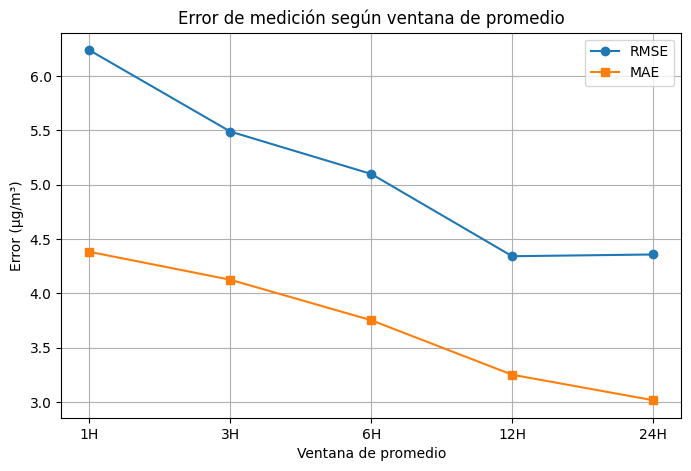

In [ ]:
#Con el siguiente codigo, graficamos el error de medicion para las ventanas anteriores

plt.figure(figsize=(8,5))

plt.plot(df_resultados["Ventana"], df_resultados["RMSE"], marker="o", label="RMSE")
plt.plot(df_resultados["Ventana"], df_resultados["MAE"], marker="s", label="MAE")

plt.title("Error de medición según ventana de promedio")
plt.xlabel("Ventana de promedio")
plt.ylabel("Error (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Ahora nos damos a la tarea de por medio de una aproximacion por minimos cuadrados, encontrar un factor alpha que disminuya el error de medicion entre los dos patrones de datos.

def calibrar_sensor(df):
    df = df.dropna(subset=["pm25_sensor", "pm25_ref"])

    X = df[["pm25_sensor"]].values.reshape(-1,1)
    y = df["pm25_ref"].values

    # Dividir en dos mitades
    n = len(df)
    mitad = n // 2
    X_train, X_test = X[:mitad], X[mitad:]
    y_train, y_test = y[:mitad], y[mitad:]

    # Ajuste lineal
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    a = modelo.coef_[0]
    b = modelo.intercept_

    print(f"Recta de calibración: y = {a:.4f} * x + {b:.4f}")

    # Validación
    y_pred = modelo.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)

    print("RMSE:", RMSE, "  MAE:", MAE)

    # --- Gráfico ---
    plt.figure(figsize=(8,6))
    plt.scatter(X_train, y_train, color="blue", alpha=0.5, label="Entrenamiento")
    plt.scatter(X_test, y_test, color="green", alpha=0.5, label="Validación")
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    plt.plot(x_line, modelo.predict(x_line), color="red", linewidth=2, label="Recta calibración")
    plt.plot(x_line, x_line, color="black", linestyle="--", label="y = x (ideal)")
    plt.legend()
    plt.xlabel("Sensor bajo costo (PM2.5)")
    plt.ylabel("Patrón de referencia (PM2.5)")
    plt.title("Calibración del sensor de bajo costo")
    plt.grid(True)
    plt.show()

    return modelo, a, b, RMSE, MAE

Recta de calibración: y = 0.1721 * x + 7.1498
RMSE: 2.686950011252438   MAE: 1.9603754434058764


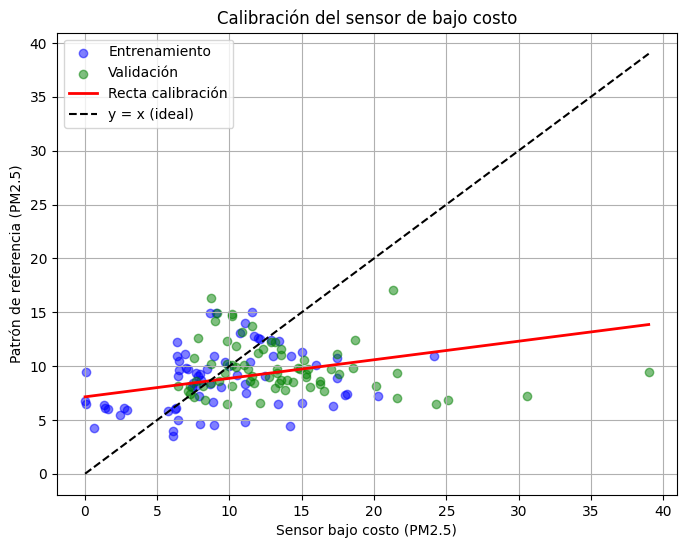

In [ ]:
#Aqui nos da el resultado de la aproximacion por minimos cuadrados y el nuevo error cuadratico medio y el nuevo error absoluto medio con la calibracion.

modelo, a, b, RMSE, MAE = calibrar_sensor(df_1h)  # aquí df_1h es el sensor y patrón alineados a 1 hora

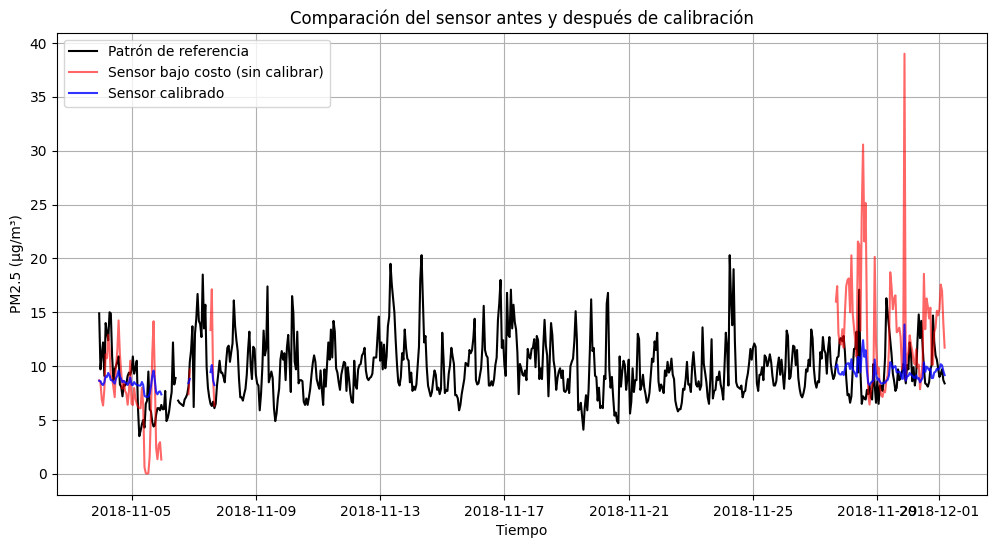

In [ ]:
#Graficamos la diferencia del sensor sin calibrar y el calibrado para la totalidad de datos.

a = 0.1721   # pendiente
b = 7.1498   # intercepto

# --- Paso 2: Aplicar calibración al sensor ---
df_1h["pm25_calibrado"] = a * df_1h["pm25_sensor"] + b

# --- Paso 3: Graficar series de tiempo ---
plt.figure(figsize=(12,6))

plt.plot(df_1h.index, df_1h["pm25_ref"], label="Patrón de referencia", color="black")
plt.plot(df_1h.index, df_1h["pm25_sensor"], label="Sensor bajo costo (sin calibrar)", alpha=0.6, color="red")
plt.plot(df_1h.index, df_1h["pm25_calibrado"], label="Sensor calibrado", alpha=0.8, color="blue")

plt.xlabel("Tiempo")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Comparación del sensor antes y después de calibración")
plt.legend()
plt.grid(True)
plt.show()